# Course Project No 3 - Part 1 - Warm-up

Let's import all the libraries that we will use in this Notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split



Define some constant used within this Notebook. Those constant might be modified if needed.

In [2]:
TRAIN_SIZE=0.5 # Train/Test data ratio
RANDOM_STATE=0 # Value passed to train_test_split function
FIGURE_SIZE=(15,5) # tuple used to set figure size
Z_SCORE_FACTOR=3 # Factor used in zscore cleanup function. If zscore is above, the value is dropped

## Task 1
Fit the following equation to a set of 50 x/y data points.

y=a∗log(x)+b

First of all, let's load data from task-1.csv file and keep 50% of it on a random basis using train_test_split() function.

Resulting data will be used to initialize two variables (x and y)

In [3]:
t1_df = pd.read_csv(os.path.join('data','task-1.csv'))

# Split data in two dataframe
t1_train_df, t1_test_df = train_test_split(t1_df, test_size = 1-TRAIN_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

# Build x and y narray from the train and test dataframe
x_tr = t1_train_df.x.values
y_tr = t1_train_df.y.values
x_te = t1_test_df.x.values
y_te = t1_test_df.y.values

x = np.concatenate((x_tr, x_te))
y = np.concatenate((y_tr, y_te))
print("Shape of x_tr variable:",x_tr.shape)
print("Shape of y_tr variable:",y_tr.shape)

print("Shape of x_te variable:",x_te.shape)
print("Shape of y_te variable:",y_te.shape)

print("Shape of x variable:",x.shape)
print("Shape of y variable:",y.shape)



Shape of x_tr variable: (25,)
Shape of y_tr variable: (25,)
Shape of x_te variable: (25,)
Shape of y_te variable: (25,)
Shape of x variable: (50,)
Shape of y variable: (50,)


Plot the train and test data in a scatter plot. We define a function to build this base graph as we will draw it later when doing regression stuff

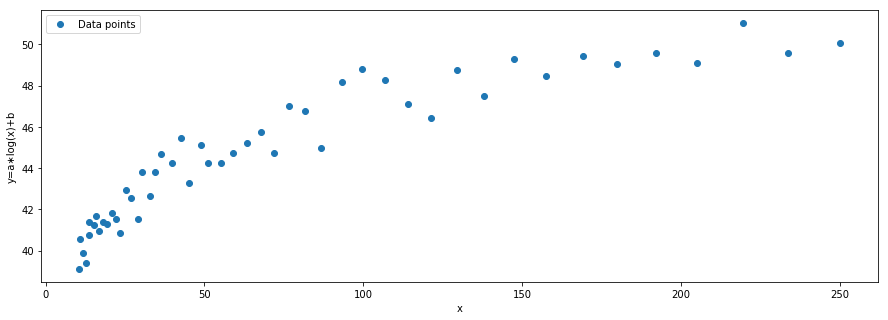

In [4]:
def drawTask1BaseGraph(x, y, xlabel = 'x', plots = ()):
    '''
    This function draws a base scatter graph using x and y passed as parameters.
    The x label can be passed as parameter as well (x scale will be different on the following graphs)
    The plots parameter is a list of tuples each containing:
        (x_values, y_values, label, color)
    This list of tuple is processed to draw the corresponding curves
    '''
    # Set figure size
    plt.figure(figsize=FIGURE_SIZE)

    for (x_plot,y_plot,label, color) in plots:
        plt.plot(x_plot, y_plot, label=label, c=color)
    
    plt.scatter(x, y, label='Data points')
    plt.xlabel(xlabel)
    plt.ylabel('y=a∗log(x)+b')
    # set legend position on the upper left corner
    plt.legend(loc="upper left")
    plt.show()

    
# Call our base graphing function
drawTask1BaseGraph(x,y)


Now, fit a model to that datapoint using the Train dataset

Before fiting a model, do some feature engineering and convert the x values to np.log(x). The resulting data point looks like to be linear, and the simplest fitting model that we could use is np.polyfit(deg=1)

Let's draw np.log(x),y plots

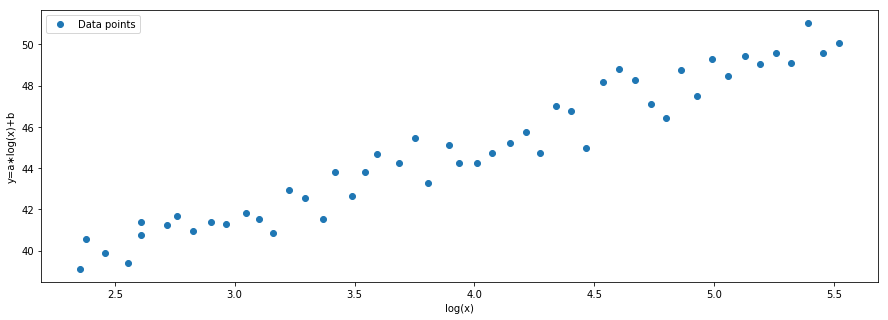

In [5]:
# Calculate np.log() x values
x_tr_log = np.log(x_tr)
x_te_log = np.log(x_te)
x_log = np.log(x)

# Draw the base graph using those np.log() values
drawTask1BaseGraph(x_log,y, xlabel='log(x)')

Let's now fit a model using np.polyfit(deg=1)

Coefficient found (deg=1):  [ 3.41817105 31.48145859]


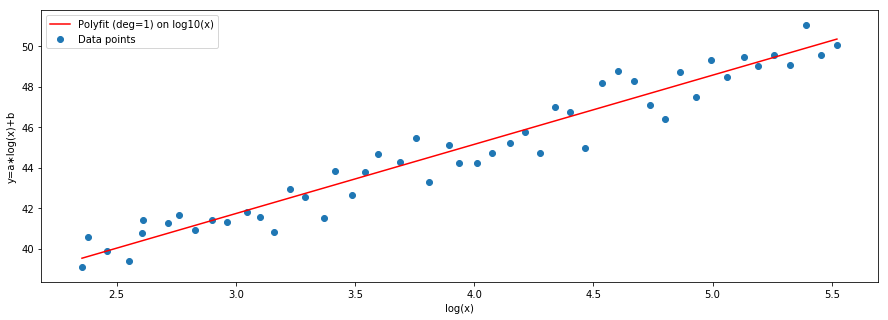

In [6]:

coef_1 = np.polyfit(x_tr_log, y_tr, deg=1)
print("Coefficient found (deg=1): ", coef_1 )

# Build linear values to plot our model
x_values = np.linspace(x_tr_log.min(), x_tr_log.max(), num=100)
y_values = np.polyval(coef_1,x_values)

drawTask1BaseGraph(x_log, y, xlabel='log(x)', plots=[(x_values, y_values, 'Polyfit (deg=1) on log10(x)', 'red')])


Now, we can easily draw the graph without the np.log() rescale using x=np.exp(x) formula

Here is the result:

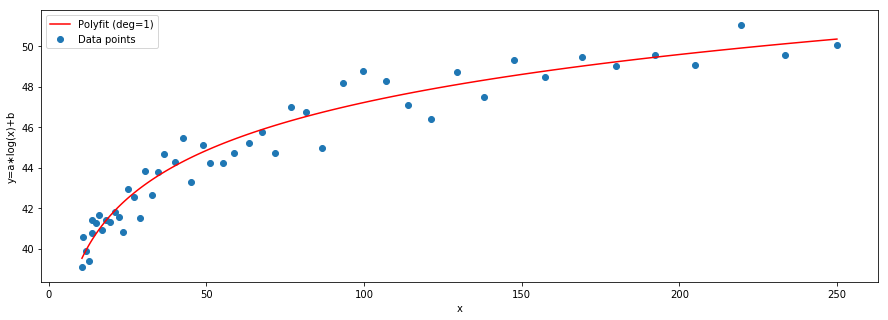

In [7]:
drawTask1BaseGraph(np.exp(x_log), y, plots=[(np.exp(x_values), y_values, 'Polyfit (deg=1)', 'red')])

Let's now evaluate our model using $R^2$ score

To do so, we will need a function that calculates the RSS value of a prediction, and calculate an RSS baseline using the mean value as prediction.

These RSS and $R^2$ calculation will use the Test dataset

In [8]:
# Define RSS measure function
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

# Calculate RSS of the baseline using y.mean()
rss_baseline = RSS(y_te, y_te.mean())
print('RSS baseline:', rss_baseline) # ~100.86

# RSS of the model (coef_1 are the polynom coefficients)
# Warning. We must use np.log(x_te) value to get y_te predicition
rss_model = RSS(y_te,np.polyval(coef_1,(x_te_log)))
print("RSS model:",rss_model)

# Calculate R2
R2 = 1 - (rss_model/rss_baseline)
print("R^2:",R2)

RSS baseline: 214.86506095999997
RSS model: 19.22548401938545
R^2: 0.9105229862245284


Our $R^2$ score is near of 1, we can conclude that our model is a good one to predict y values of our dataset.

To go further, we can check if increasing the polyfit degree parameter could improve our $R^2$ score. Let's use deg=3 and deg=5 and plot a bar chart to compare our RSS results. The bar graph y axis limit will be set near of the R2 score in order to see the difference between the three different models.

RSS model (deg=1): 19.22548401938545
RSS model (deg=3): 18.681404097662988
RSS model (deg=5): 18.85732850620712
R^2 (deg=1): 0.9105229862245284
R^2 (deg=3): 0.9130551797756417
R^2 (deg=5): 0.9122364128353205


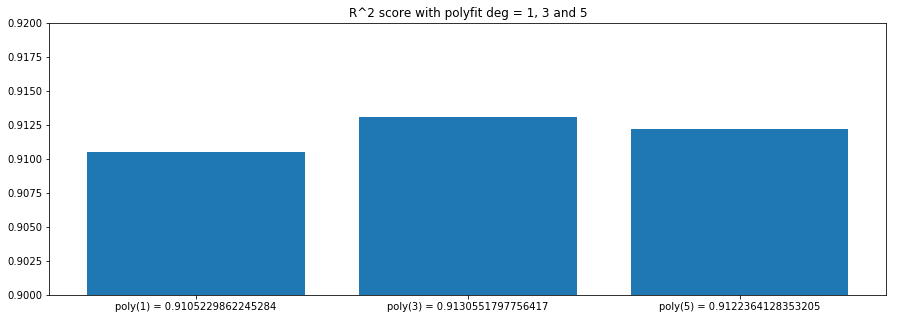

In [9]:
coef_3 = np.polyfit(x_tr_log, y_tr, deg=3)
coef_5 = np.polyfit(x_tr_log, y_tr, deg=5)

# Build linear values to plot our model
y_values_3 = np.polyval(coef_3,x_values)
y_values_5 = np.polyval(coef_5,x_values)

rss_model_3 = RSS(y_te,np.polyval(coef_3,(x_te_log)))
rss_model_5 = RSS(y_te,np.polyval(coef_5,(x_te_log)))
print("RSS model (deg=1):",rss_model)
print("RSS model (deg=3):",rss_model_3)
print("RSS model (deg=5):",rss_model_5)

# Calculate R2
R2_3 = 1 - (rss_model_3/rss_baseline)
R2_5 = 1 - (rss_model_5/rss_baseline)
print("R^2 (deg=1):",R2)
print("R^2 (deg=3):",R2_3)
print("R^2 (deg=5):",R2_5)

# Bar chart to compare our model
plt.figure(figsize=FIGURE_SIZE)
plt.bar([1, 2, 3], [R2, R2_3, R2_5])
plt.xticks([1, 2, 3], ['poly(1) = '+str(R2),'poly(3) = '+str(R2_3),'poly(5) = '+str(R2_5)])
plt.title('R^2 score with polyfit deg = 1, 3 and 5')
plt.ylim((0.9, 0.92))
plt.show()



### Task 1: Conclusion

Using a np.log() transformation as feature engineering allows us to perform a simple np.polyfit() regression.
A basic *grid search* on the degree parameter of np.polyfit() demonstrate that degree=1 is a good estimator, and degree=3 might be a very little bit better.

The coeeficient found with degree=1 are: *[ 3.41817105 31.48145859]*

That say, to predict Y values with X dataset, dont't forget to transform your X values to np.log(X) ;-)

## Task 2

Fit a model to a set of data points that contains outliers.

In this second task, the Train/Test split ratio has to be set to 80/20. We change the value of our global variable to match this new requirement.

In [10]:
TRAIN_SIZE=0.8

Use the train_test_split() function to build our train and test dataframes

In [11]:
t2_df = pd.read_csv(os.path.join('data','task-2.csv'))

# Split data in two dataframe
t2_train_df, t2_test_df = train_test_split(t2_df, test_size = 1-TRAIN_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)



Define the MAE function we will be using here to evaluate aour models.
> Note that we could also load the MAE function available in the sklearn library.

In [12]:
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

Import the needed sklearn modules we will use here to fit models:
- Pipeline: To set u a pipeline for data processing
- StandardScaler: to rescale our variables
- LinearRegressor: To fit and predict Linear model
- HuberRegression: To fit and predict Huber model


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor


Define two different pipeline, one using LinearRegression class, and another one using HuberRegressor

In [14]:

# Create LR pipeline
pipeLR = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])


# Create Huber pipeline
pipeHuber = Pipeline([
    ('scaler', StandardScaler()),
    ('huber', HuberRegressor())
])



Last usefull function that we will need, a z-score one that takes a pd.DataFrame as parameter and returns a cleaned copy of that pd.DataFrame where z-score outliers in the designated column have been removed. A third parameter is used to set the z-score factor (how far from standard deviation do we accept datapoints). This factor is set to 2 by default.

In [15]:
from scipy.stats import zscore

def zScoreCleanUp(df, columns, factor=2):
    '''
    Function that calculate zscore on columns passed as parameter and returns a copy of the DataFrame
    received as parameter without lines where np.abs(zscore) is above factor value for at least one of the cell
    of the line.
    This function returns a copy of the dataframe received as first parameter. The original one is not modified.
    '''

    # Calculate zscore of each cells of the columns passed as parameter
    zscore_values = zscore(df[columns])
    
    # Build an arraqy of boolen where True = np.abs(zscore) is lower than factor
    zscore_bool = np.abs(zscore_values) < factor
    
    # Use the all(axis=1) function on zscore_bool array to get a 1-row-array containing boolean values
    # where True = all cell of the zscore_bool corresponding line are True
    # This 1-row-array will be used to filter the original dataframe
    return df[zscore_bool.all(axis=1)].copy()
    


### Data preparation and cleanup

Fine, we have all the needed material to work on our dataset. It's time now to build our feature and result matrix set, one with outliers, the other without.

Let's start by building X and y matrix, and plot the train Dataset

Shape of X_tr feature matrix: (800, 3)
Shape of y_tr result vector : (800,)
Shape of X_te feature matrix: (200, 3)
Shape of y_te result vector : (200,)
Ratio between train/test = 80 / 20


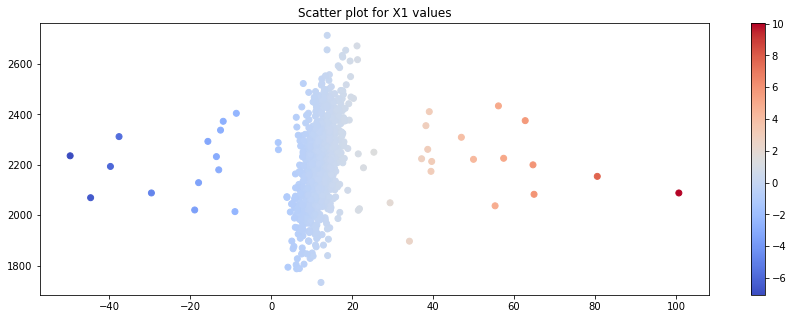

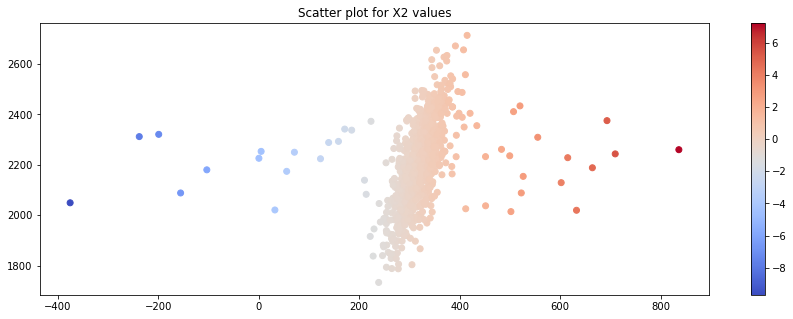

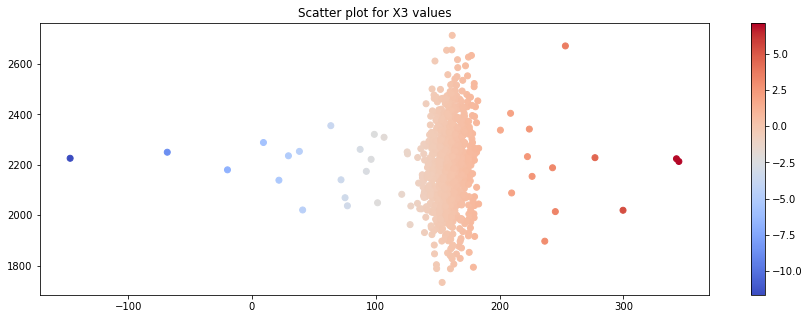

In [16]:
X_tr = t2_train_df.drop('y', axis=1).values
y_tr = t2_train_df['y'].values

X_te = t2_test_df.drop('y', axis=1).values
y_te = t2_test_df['y'].values

print("Shape of X_tr feature matrix:",X_tr.shape)
print("Shape of y_tr result vector :",y_tr.shape)

print("Shape of X_te feature matrix:",X_te.shape)
print("Shape of y_te result vector :",y_te.shape)

print("Ratio between train/test = {:.0f} / {:.0f}".format(y_tr.shape[0]*100/(y_tr.shape[0] + y_te.shape[0]), y_te.shape[0]*100/(y_tr.shape[0] + y_te.shape[0])))


def plotDataset(df):
    for i in range(1,4):
        plt.figure(figsize=FIGURE_SIZE)

        x = df['x'+str(i)].values
        y = df['y'].values
        z_scores = zscore(df['x'+str(i)])

        plt.scatter(x, y, c=z_scores, cmap='coolwarm')
        plt.title('Scatter plot for X{} values'.format(i))
        plt.colorbar()
        plt.show()


plotDataset(t2_train_df)


The previous graphs demonstrate clearly that we are facing an outlier problem with this dataset.

Let's do some cleanup and remove outliers in this dataframe, and build feature matrix and result vector.

> Question: Should I remove y outliers as well ?

Shape of X_tr feature matrix: (800, 3)
Shape of y_tr result vector : (800,)
Shape of X_te feature matrix: (200, 3)
Shape of y_te result vector : (200,)


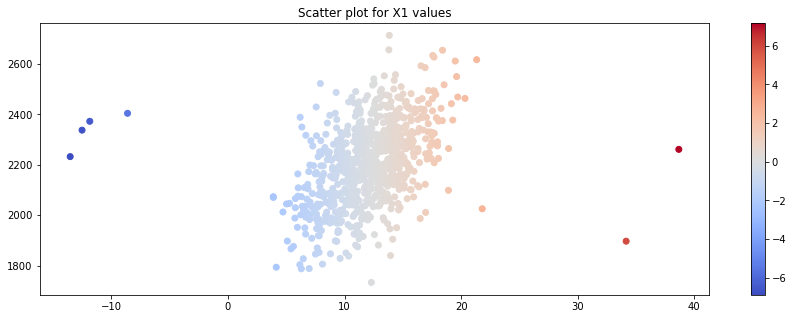

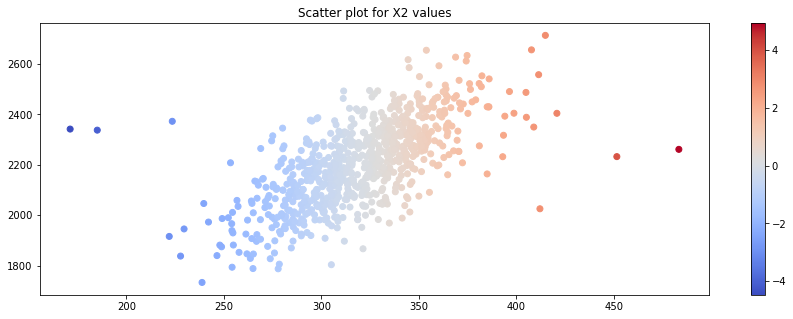

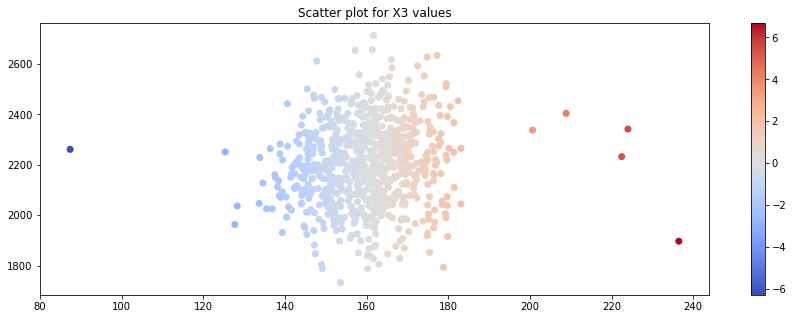

In [17]:
columns_to_clean = ['x1','x2','x3']
t2_train_cleaned_df = zScoreCleanUp(t2_train_df, columns=columns_to_clean, factor=Z_SCORE_FACTOR)
t2_test_cleaned_df  = zScoreCleanUp(t2_test_df, columns=columns_to_clean, factor=Z_SCORE_FACTOR)


X_tr_cleaned = t2_train_cleaned_df.drop('y', axis=1).values
y_tr_cleaned = t2_train_cleaned_df['y'].values

X_te_cleaned = t2_test_cleaned_df.drop('y', axis=1).values
y_te_cleaned = t2_test_cleaned_df['y'].values

print("Shape of X_tr feature matrix:",X_tr.shape)
print("Shape of y_tr result vector :",y_tr.shape)

print("Shape of X_te feature matrix:",X_te.shape)
print("Shape of y_te result vector :",y_te.shape)

plotDataset(t2_train_cleaned_df)

### Fit model

First thing to do, fit three different models:
* LinearRegression with outliers
* HuberRegressor with outliers
* LinearRegression without outliers

We will use the pipeline object defined above. Those pipeline includes a data scaling process for better regression results.

After fitting the model, we will evaluate them using MAE() function.

#### Linear regression with outliers

In [18]:
# fit model LR with outliers
pipeLR.fit(X_tr, y_tr)

# predict values
y_pred_lr_all = pipeLR.predict(X_te)

mae_lr_all = MAE(y_te, y_pred_lr_all)

print("MAE with LinearRegression and outliers: {:.2f}".format(mae_lr_all))

MAE with LinearRegression and outliers: 104.79


#### Linear regression without outliers

In [19]:
# fit model LR without outliers
pipeLR.fit(X_tr_cleaned, y_tr_cleaned)

# predict values
y_pred_lr_cleaned = pipeLR.predict(X_te_cleaned)

mae_lr_cleaned = MAE(y_te_cleaned, y_pred_lr_cleaned)

print("MAE with LinearRegression and without outliers: {:.2f}".format(mae_lr_cleaned))

MAE with LinearRegression and without outliers: 53.88


#### Huber Regressor with outliers

In [20]:
# fit model Huber with outliers
pipeHuber.fit(X_tr, y_tr)

# predict values
y_pred_huber = pipeHuber.predict(X_te)

mae_huber_all = MAE(y_te, y_pred_huber)

print("MAE with HuberRegressor and outliers: {:.2f}".format(mae_huber_all))

MAE with HuberRegressor and outliers: 83.91


#### Huber Regressor without outliers

Even if not requested in the project, let's have a look at what MAE value we obtain using HuberRegressor without outliers

In [21]:
# fit model LR without outliers
pipeHuber.fit(X_tr_cleaned, y_tr_cleaned)

# predict values
y_pred_huber_cleaned = pipeHuber.predict(X_te_cleaned)

mae_huber_cleaned = MAE(y_te_cleaned, y_pred_huber_cleaned)

print("MAE with HuberRegressor and without outliers: {:.2f}".format(mae_huber_cleaned))

MAE with HuberRegressor and without outliers: 49.44


### Evaluate model using a bar graph

In order to fully evaluate our model, we will calculate an MEA baseline using y_te.mean() as prediction.

MAE results of our different models:
	Baseline w/outliers : 		115.83   
	LR with outliers : 		104.79   
	Huber wizh outliers : 		83.91   
	Huber w/o outliers : 		49.44   (smallest value)
	LR w/o outliers : 		53.88   


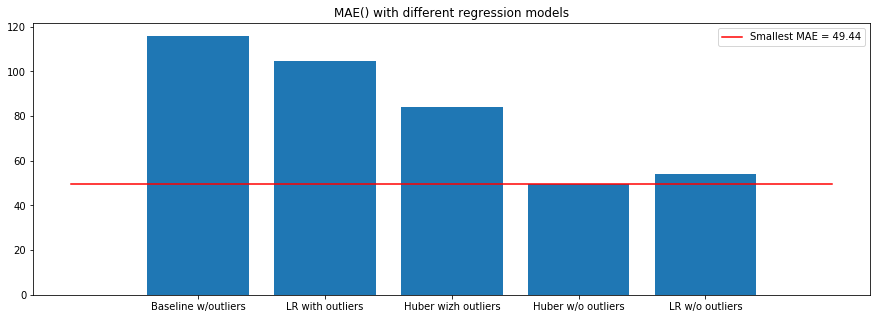

In [22]:
mae_baseline = MAE(y_te, y_te.mean())

mae_values = [mae_baseline, mae_lr_all, mae_huber_all, mae_huber_cleaned, mae_lr_cleaned]
mae_labels = ['Baseline w/outliers', 'LR with outliers', 'Huber wizh outliers','Huber w/o outliers', 'LR w/o outliers']

print("MAE results of our different models:")
for (label, value) in zip(mae_labels, mae_values):
    if value == np.min(mae_values):
        smallest = "(smallest value)"
    else:
        smallest = ""
    print("\t{} : \t\t{:.2f}   {}".format(label, value, smallest))

# Bar chart to compare our model
plt.figure(figsize=FIGURE_SIZE)
plt.bar([1, 2, 3, 4, 5], mae_values)
plt.xticks([1, 2, 3, 4, 5], mae_labels)
plt.title('MAE() with different regression models')

mae_min = np.min(mae_values)
plt.plot([0,6],[mae_min, mae_min], c='red', label="Smallest MAE = {:.2f}".format(mae_min))

plt.legend()
plt.show()




#### Conclusion

Removing outliers is definitely a good options as both models, HuberRegressor and LinearRegression, performs very well without those extreme values. On top of that, MAE for both regressor are nearly equal, both of these models perform the same without outliers.

Models with outliers are less efficient, that's what we were expecting. What is noticeable is the performance of the HuberRegressor with outliers, which is far better than the LinearRegression one.

Finally, LinearRegression with outliers is really not a good option as it performs a bit better than our baseline, which is really not a good resuilt.